In [2]:
#1A
import tensorflow as tf
from tensorflow import keras

from matplotlib import pyplot as plt
import numpy as np

import cv2

import sklearn.metrics

### Zadanie 1

In [3]:
#1B

# Load MNIST data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train_normalized = tf.keras.utils.normalize(x_train, axis=-1, order=2)
x_test_normalized = tf.keras.utils.normalize(x_test, axis=-1, order=2)

11501568/11490434 [==============================] - 0s 0us/step


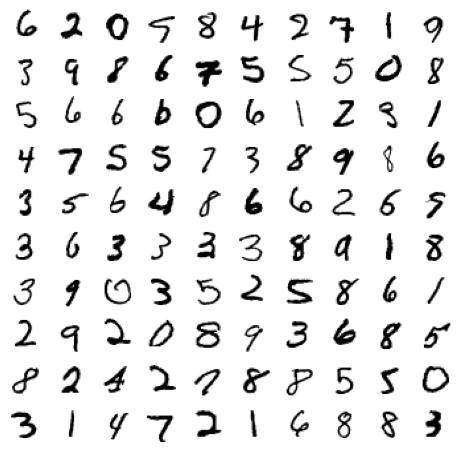

In [3]:
#1C
def plot_random_pics(data, nmb_of_pics =10):
    fig, axes1 = plt.subplots(nmb_of_pics, nmb_of_pics,figsize=(8,8))

    for j in range(nmb_of_pics):
        for k in range(nmb_of_pics):
            i = np.random.choice(range(len(data)))
            axes1[j][k].set_axis_off()
            axes1[j][k].imshow(data[i], cmap="binary")
            
# Plot random pictures from dataset
plot_random_pics(x_train, 10)

In [4]:
y_train[101]

7

In [5]:
#1D 
keras.backend.clear_session()
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(40, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


In [6]:
#1E

# Compile model with loss set to sparse categorical crossentropy and optimzer set to sgd
model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "SGD", 
             metrics = ["accuracy"])

In [8]:
#1F 

# train model with 3 epochs
history = model.fit(x_train_normalized, y_train, 
                    epochs=3, validation_split=0.2, verbose = 2)

Epoch 1/3
1500/1500 - 3s - loss: 0.3851 - accuracy: 0.8904 - val_loss: 0.3359 - val_accuracy: 0.9068 - 3s/epoch - 2ms/step
Epoch 2/3
1500/1500 - 2s - loss: 0.3545 - accuracy: 0.8980 - val_loss: 0.3148 - val_accuracy: 0.9118 - 2s/epoch - 2ms/step
Epoch 3/3
1500/1500 - 2s - loss: 0.3333 - accuracy: 0.9044 - val_loss: 0.2984 - val_accuracy: 0.9158 - 2s/epoch - 1ms/step


In [9]:
evaluation = model.evaluate(x_test_normalized, y_test, verbose = 2)

313/313 - 1s - loss: 0.3126 - accuracy: 0.9096 - 569ms/epoch - 2ms/step


In [12]:
y_test_pred = model.predict(x_test_normalized)
y_test_pred

array([[3.0387289e-06, 6.2185819e-08, 9.8494784e-05, ..., 9.9702966e-01,
        5.7474485e-06, 2.4272408e-03],
       [1.0615828e-02, 4.5050774e-04, 5.1738256e-01, ..., 3.3847678e-07,
        4.3053057e-02, 1.4220864e-04],
       [1.0050651e-06, 9.8184007e-01, 1.2159213e-02, ..., 8.5675635e-04,
        2.6844216e-03, 1.3877587e-04],
       ...,
       [1.0540447e-04, 6.7226436e-05, 5.4057618e-04, ..., 2.7553225e-02,
        3.6620039e-02, 1.7421587e-01],
       [3.8330476e-03, 1.2514044e-03, 7.9929031e-04, ..., 7.4028758e-05,
        1.0048556e-01, 1.2687320e-03],
       [7.6802552e-04, 6.7196382e-08, 4.7932798e-04, ..., 2.1103334e-07,
        5.0646100e-05, 8.7202488e-06]], dtype=float32)

In [14]:
y_test_pred.argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6])

In [15]:
#1G

matrix = sklearn.metrics.confusion_matrix(y_test, y_test_pred.argmax(axis=1))
matrix 

array([[ 954,    0,    6,    1,    0,    2,    9,    1,    7,    0],
       [   0, 1104,    6,    5,    2,    1,    3,    0,   14,    0],
       [  16,    4,  905,   13,   13,    3,   18,   19,   32,    9],
       [   3,    0,   25,  921,    3,   26,    2,   10,   12,    8],
       [   3,    3,    5,    2,  904,    3,    8,    3,   14,   37],
       [  14,    7,    2,   40,   16,  756,   20,    6,   23,    8],
       [   9,    3,   11,    2,   13,    9,  908,    0,    3,    0],
       [   1,   16,   24,    4,   15,    1,    0,  936,    1,   30],
       [  12,    4,   20,   14,   18,   13,   18,    6,  852,   17],
       [  10,    8,    6,   11,   75,    8,    1,   26,    8,  856]])

2

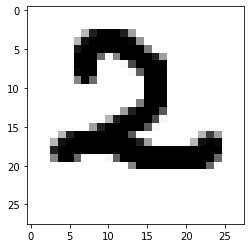

In [18]:
#1H
# pokazac jedynke "z kreska" i bez. odniesc do zbioru uczacego
import cv2

img=cv2.imread('2.bmp', cv2.IMREAD_GRAYSCALE)

img = 255 - img



img_normalized = tf.keras.utils.normalize(img, axis=-1, order=2)

np.expand_dims(img, axis=0)
plt.imshow(img, cmap="binary")

img_normalized.shape
model.predict(np.expand_dims(img_normalized, axis=0)).argmax()

1

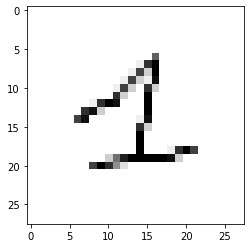

In [19]:
#1H
# pokazac jedynke "z kreska" i bez. odniesc do zbioru uczacego
import cv2

img=cv2.imread('1z.bmp', cv2.IMREAD_GRAYSCALE)

img = 255 - img



img_normalized = tf.keras.utils.normalize(img, axis=-1, order=2)

np.expand_dims(img, axis=0)
plt.imshow(img, cmap="binary")

img_normalized.shape
model.predict(np.expand_dims(img_normalized, axis=0)).argmax()

6

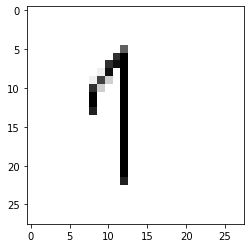

In [20]:
#1H
# pokazac jedynke "z kreska" i bez. odniesc do zbioru uczacego
import cv2

img=cv2.imread('1bez.bmp', cv2.IMREAD_GRAYSCALE)

img = 255 - img



img_normalized = tf.keras.utils.normalize(img, axis=-1, order=2)

np.expand_dims(img, axis=0)
plt.imshow(img, cmap="binary")

img_normalized.shape
model.predict(np.expand_dims(img_normalized, axis=0)).argmax()

1

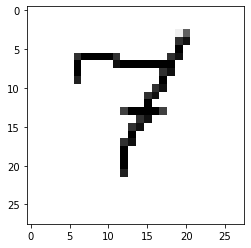

In [21]:
#1H
# pokazac jedynke "z kreska" i bez. odniesc do zbioru uczacego
import cv2

img=cv2.imread('7z.bmp', cv2.IMREAD_GRAYSCALE)

img = 255 - img



img_normalized = tf.keras.utils.normalize(img, axis=-1, order=2)

np.expand_dims(img, axis=0)
plt.imshow(img, cmap="binary")

img_normalized.shape
model.predict(np.expand_dims(img_normalized, axis=0)).argmax()

3

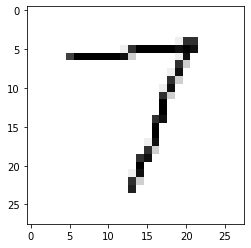

In [22]:
#1H
# pokazac jedynke "z kreska" i bez. odniesc do zbioru uczacego
import cv2

img=cv2.imread('7bez.bmp', cv2.IMREAD_GRAYSCALE)

img = 255 - img



img_normalized = tf.keras.utils.normalize(img, axis=-1, order=2)

np.expand_dims(img, axis=0)
plt.imshow(img, cmap="binary")

img_normalized.shape
model.predict(np.expand_dims(img_normalized, axis=0)).argmax()

3

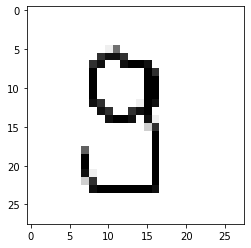

In [23]:
#1H
# pokazac jedynke "z kreska" i bez. odniesc do zbioru uczacego
import cv2

img=cv2.imread('9.bmp', cv2.IMREAD_GRAYSCALE)

img = 255 - img



img_normalized = tf.keras.utils.normalize(img, axis=-1, order=2)

np.expand_dims(img, axis=0)
plt.imshow(img, cmap="binary")

img_normalized.shape
model.predict(np.expand_dims(img_normalized, axis=0)).argmax()

Model poprawnie rozpoznał tylko w 2 na 6 przypadków narysowanych przeze mnie cyfr.

### Zadanie 2

A. Ile wynosi i co oznacza parametr batch_size?
Odp.
Liczba całkowita lub None, domyślnie 32. Oznacza liczbę próbek na jedną aktualizację gradientu.

Co oznacza oraz skąd wzięła się taka wartość liczby “1500” podawana na
początku każdej linii logów w procesie uczenia?

60000*08/32 = 1500 kroków uczenia w ramach każdej epoki

### Zadanie 3

In [ ]:
#A
nmb_of_tests_per_architecture = 5
nmb_of_neurons_at_disposal = 600 

results_for_nmb_of_hidden_layers = {}

for current_nmb_of_hidden_layers in range(1,10):
    current_val_accuracy = 0
    
    for j in range(nmb_of_tests_per_architecture):
        keras.backend.clear_session()

        model = keras.models.Sequential()

        model.add(keras.layers.Flatten(input_shape=[28,28]))

        for hidden_layer in range(1, current_nmb_of_hidden_layers):
            model.add(keras.layers.Dense(int(nmb_of_neurons_at_disposal/current_nmb_of_hidden_layers), activation="relu"))
        
        model.add(keras.layers.Dense(10, activation="softmax"))
        
        model.compile(loss = "sparse_categorical_crossentropy",
                 optimizer = "sgd", 
                 metrics = ["accuracy"])
    
        history = model.fit(x_train_normalized, y_train, epochs=4, validation_data=(x_test_normalized, y_test), verbose=2)
        
        current_val_accuracy += max(history.history['val_accuracy'])
    
    current_val_accuracy = current_val_accuracy / nmb_of_tests_per_architecture
    
    results_for_nmb_of_hidden_layers[current_nmb_of_hidden_layers] = current_val_accuracy

Text(0, 0.5, 'Accuracy na zbiorze testowym')

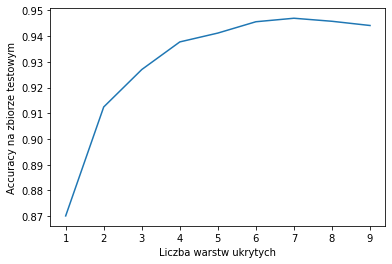

In [6]:
#B
lists = sorted(results_for_nmb_of_hidden_layers.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) 

plt.plot(x,y)
plt.xlabel("Liczba warstw ukrytych")
plt.ylabel("Accuracy na zbiorze testowym")

Zauważalny jest spadek od siódemki i biegnie aż do 9.

### Zadanie 4

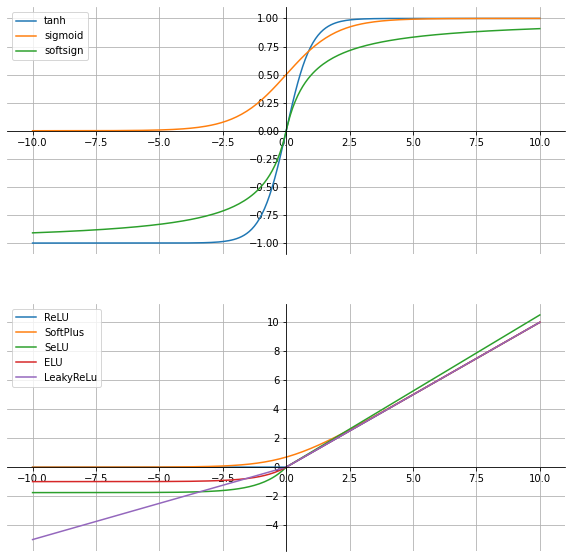

In [5]:
x = np.linspace(-10,10,200)
a = tf.constant(x, dtype = tf.float32)

y_sigmoid = tf.keras.activations.sigmoid(x).numpy()
y_tanh= tf.keras.activations.tanh(x).numpy()
y_softsign= tf.keras.activations.softsign(x).numpy()
y_relu = tf.keras.activations.relu(x).numpy()
y_softplus = tf.keras.activations.softplus(x).numpy()
y_selu = tf.keras.activations.selu(x).numpy()
y_elu = tf.keras.activations.elu(x).numpy()

y_leaky_relu = tf.keras.layers.LeakyReLU(alpha = 0.5)(x).numpy()

fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(2, 1, 1)

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid()


plt.plot(x, y_tanh, label='tanh')
plt.plot(x, y_sigmoid, label='sigmoid')
plt.plot(x, y_softsign, label='softsign')
ax.legend(loc="upper left")


ax = fig.add_subplot(2, 1, 2)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.plot(x, y_relu, label='ReLU')
plt.plot(x, y_softplus, label='SoftPlus')
plt.plot(x, y_selu, label='SeLU')
plt.plot(x, y_elu, label='ELU')
plt.plot(x, y_leaky_relu, label='LeakyReLu')

ax.legend(loc="upper left")

ax.grid()

fig.savefig('./temp.png', dpi = 300)

plt.show()

### Zadanie 5

In [8]:
keras.backend.clear_session()

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(40, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "sgd", 
             metrics = ["accuracy"])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1, verbose=2)

Epoch 1/5
1688/1688 - 5s - loss: 11.5668 - accuracy: 0.1822 - val_loss: 2.0206 - val_accuracy: 0.2500 - 5s/epoch - 3ms/step
Epoch 2/5
1688/1688 - 4s - loss: 2.1365 - accuracy: 0.1987 - val_loss: 2.2144 - val_accuracy: 0.1458 - 4s/epoch - 3ms/step
Epoch 3/5
1688/1688 - 5s - loss: 2.1845 - accuracy: 0.1767 - val_loss: 1.9748 - val_accuracy: 0.2440 - 5s/epoch - 3ms/step
Epoch 4/5
1688/1688 - 4s - loss: 2.0156 - accuracy: 0.2528 - val_loss: 1.9332 - val_accuracy: 0.2835 - 4s/epoch - 3ms/step
Epoch 5/5
1688/1688 - 4s - loss: 1.9451 - accuracy: 0.2715 - val_loss: 2.0236 - val_accuracy: 0.2165 - 4s/epoch - 2ms/step


Validation accuracy jest bardzo niskie

In [9]:
keras.backend.clear_session()

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(40, activation="sigmoid"))
model.add(keras.layers.Dense(10, activation="softmax"))


model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "sgd", 
             metrics = ["accuracy"])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1, verbose=2)

Epoch 1/5
1688/1688 - 5s - loss: 0.9700 - accuracy: 0.7611 - val_loss: 0.5560 - val_accuracy: 0.8813 - 5s/epoch - 3ms/step
Epoch 2/5
1688/1688 - 4s - loss: 0.5379 - accuracy: 0.8635 - val_loss: 0.4238 - val_accuracy: 0.8902 - 4s/epoch - 2ms/step
Epoch 3/5
1688/1688 - 4s - loss: 0.4443 - accuracy: 0.8829 - val_loss: 0.3832 - val_accuracy: 0.9023 - 4s/epoch - 3ms/step
Epoch 4/5
1688/1688 - 5s - loss: 0.4240 - accuracy: 0.8821 - val_loss: 0.3452 - val_accuracy: 0.9047 - 5s/epoch - 3ms/step
Epoch 5/5
1688/1688 - 4s - loss: 0.3947 - accuracy: 0.8892 - val_loss: 0.3212 - val_accuracy: 0.9125 - 4s/epoch - 2ms/step


Validation accuracy z użyciem funkcji sigmoid ma wyższe wartości niż przy relu. Funkcja aktywacji sigmoid zawęża zakres danych (do [0,1]) już na poziomie wyjścia z warstwy ukrytej, co przy braku wcześniejszej normalizacji daje nam lepsze wyniki niż przy użyciu ReLU. 

In [10]:
keras.backend.clear_session()

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(40, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "sgd", 
             metrics = ["accuracy"])

history = model.fit(x_train_normalized, y_train, epochs=5, validation_split=0.1, verbose=2)

Epoch 1/5
1688/1688 - 5s - loss: 1.2194 - accuracy: 0.7015 - val_loss: 0.5772 - val_accuracy: 0.8738 - 5s/epoch - 3ms/step
Epoch 2/5
1688/1688 - 4s - loss: 0.5345 - accuracy: 0.8593 - val_loss: 0.3838 - val_accuracy: 0.9055 - 4s/epoch - 2ms/step
Epoch 3/5
1688/1688 - 4s - loss: 0.4244 - accuracy: 0.8820 - val_loss: 0.3214 - val_accuracy: 0.9165 - 4s/epoch - 3ms/step
Epoch 4/5
1688/1688 - 4s - loss: 0.3763 - accuracy: 0.8931 - val_loss: 0.2904 - val_accuracy: 0.9218 - 4s/epoch - 3ms/step
Epoch 5/5
1688/1688 - 5s - loss: 0.3472 - accuracy: 0.9009 - val_loss: 0.2679 - val_accuracy: 0.9255 - 5s/epoch - 3ms/step


ReLU z zastosowaniem normalizacji daje jeszcze lepsze wyniki niż poprzedni sigmoid.

### Zadanie 6

In [12]:
keras.backend.clear_session()

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(40, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "sgd", 
             metrics = ["accuracy"])

history = model.fit(x_train_normalized, y_train, epochs=3, validation_split=0.1, verbose=2)

Epoch 1/3
1688/1688 - 6s - loss: 0.5225 - accuracy: 0.8469 - val_loss: 0.2282 - val_accuracy: 0.9325 - 6s/epoch - 4ms/step
Epoch 2/3
1688/1688 - 5s - loss: 0.2746 - accuracy: 0.9168 - val_loss: 0.1778 - val_accuracy: 0.9497 - 5s/epoch - 3ms/step
Epoch 3/3
1688/1688 - 5s - loss: 0.2277 - accuracy: 0.9323 - val_loss: 0.1547 - val_accuracy: 0.9567 - 5s/epoch - 3ms/step


Batch Normalization dało jeszcze lepsze wyniki, chociaż w moich obliczeniach czas wydłużył sie o około 1s na epokę.

### Zadanie 7 

In [15]:
keras.backend.clear_session()

model = keras.models.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=7, activation="relu", input_shape=[28, 28, 1], padding="SAME"),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(filters=128, kernel_size=7, activation="relu", padding="SAME"),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation="relu"),
    keras.layers.Dense(units=10, activation='softmax'),
])

model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "adam", 
             metrics = ["accuracy"])

x_train_normalized_conv = x_train_normalized[..., np.newaxis]

history = model.fit(x_train_normalized_conv, y_train, epochs=3, validation_split=0.1, verbose=2)


Epoch 1/3
1688/1688 - 17s - loss: 0.1218 - accuracy: 0.9609 - val_loss: 0.0460 - val_accuracy: 0.9855 - 17s/epoch - 10ms/step
Epoch 2/3
1688/1688 - 17s - loss: 0.0391 - accuracy: 0.9883 - val_loss: 0.0370 - val_accuracy: 0.9898 - 17s/epoch - 10ms/step
Epoch 3/3
1688/1688 - 17s - loss: 0.0265 - accuracy: 0.9918 - val_loss: 0.0307 - val_accuracy: 0.9902 - 17s/epoch - 10ms/step


Zmiana optymalizera na Adam poprawiła wyniki val_accuracy i w 3 epoce udało się się osiągnąć 0.9902

9

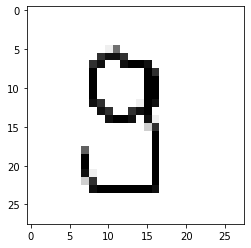

In [17]:
import cv2

img=cv2.imread('9.bmp', cv2.IMREAD_GRAYSCALE)

img = 255 - img



img_normalized = tf.keras.utils.normalize(img, axis=-1, order=2)

np.expand_dims(img, axis=0)
plt.imshow(img, cmap="binary")

img_normalized = img_normalized[..., np.newaxis]
img_normalized.shape
model.predict(np.expand_dims(img_normalized, axis=0)).argmax()

7

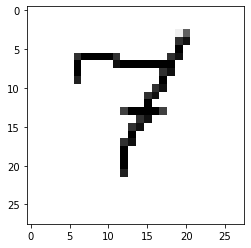

In [18]:
import cv2

img=cv2.imread('7z.bmp', cv2.IMREAD_GRAYSCALE)

img = 255 - img



img_normalized = tf.keras.utils.normalize(img, axis=-1, order=2)

np.expand_dims(img, axis=0)
plt.imshow(img, cmap="binary")

img_normalized = img_normalized[..., np.newaxis]
img_normalized.shape
model.predict(np.expand_dims(img_normalized, axis=0)).argmax()

7

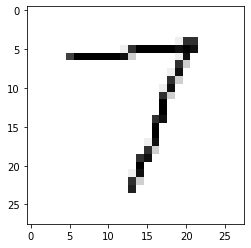

In [19]:
import cv2

img=cv2.imread('7bez.bmp', cv2.IMREAD_GRAYSCALE)

img = 255 - img



img_normalized = tf.keras.utils.normalize(img, axis=-1, order=2)

np.expand_dims(img, axis=0)
plt.imshow(img, cmap="binary")

img_normalized = img_normalized[..., np.newaxis]
img_normalized.shape
model.predict(np.expand_dims(img_normalized, axis=0)).argmax()

1

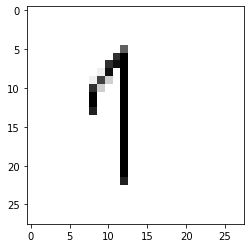

In [20]:
import cv2

img=cv2.imread('1bez.bmp', cv2.IMREAD_GRAYSCALE)

img = 255 - img



img_normalized = tf.keras.utils.normalize(img, axis=-1, order=2)

np.expand_dims(img, axis=0)
plt.imshow(img, cmap="binary")

img_normalized = img_normalized[..., np.newaxis]
img_normalized.shape
model.predict(np.expand_dims(img_normalized, axis=0)).argmax()

Obecny model poprawnie zaklasyfikował cyfry, których wcześniejszy nie potrafił rozpoznać! Mamy sukces :)